In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.consignes{
  font-weight: bold;
  color: #3256a8;
  background-color: #edebdf
}
</style>
""")



# <div class=consignes>Deep Learning et traitement du signal TP 1 </div>
<div class=consignes> L'objectif de ce TP est de prendre en main les outils de modélisation et d'analyse du signal présentés dans le premier cours et d'introduire la problématique de <it>détection</it> dont on parlera dans le cours numéro 3 </div>
<div class=consignes>Deadline : 16 octobre 2024, 13h59, par mail à deepetsignal.mva@gmail.com <br> Effort estimé : 2 à 3 heures maximum</div>
<div class=consignes>Le rendu de ce TP n'est pas obligatoire. Il permet d'obtenir un bonus de 1 (minimum syndical) à 3 (votre notebook servira de correction l'an prochain) points sur la moyenne des TP </div>

<div class=consignes> Listez les noms des étudiants (2 au maximum) ayant participé à ce notebook dans la cellule suivante (prénom, nom).<br/>
Au moment du rendu, le notebook doit être nommé nom1_nom2_dlts_tp1.ipynb </div>

Naïl Khelifa 

<div class=consignes>Si vous installez des paquets supplémentaires, merci de les lister dans la cellule suivante avec la syntaxe
    
```
!pip install \< nom_du_paquet \>
```
    
</div>

In [2]:
import numpy as np 
import matplotlib.pylab as plt 
import scipy
import IPython.display as ipd

# **Partie 1 - Audio** 

## *Visualisation*

### **Question 0**

#### - Enregistrez un fichier wav de quelques secondes de votre voix. 
#### - Importez le avec scipy.io.wavfile.read et écoutez le dans le notebook avec IPython.display.Audio

In [52]:
# Importer les bibliothèques nécessaires
from scipy.io import wavfile
from IPython.display import Audio

audio_path = '/Users/khelifanail/Desktop/MVA/S1/Appentissage Profond et traitement du signal/TP/TP1/nail_4.wav'

# Lire le fichier WAV
rate, data = wavfile.read(audio_path)

'''
- rate = Fréquence d'échantillonnage (en anglais, "sampling rate"). Elle représente le nombre d'échantillons par seconde dans le fichier audio.
- data = tableau 1D (notre fichiers audio mono).
'''


# Pour écouter le fichier dans le notebook avec IPython.display.Audio
Audio(data, rate=rate)

### **Question 2**
#### - Visualisez la forme d'onde temporelle de ce signal audio. 
#### - Estimez et affichez sa Densité Spectrale de Puissance. 
#### - Donnez une interprétation de ce que vous observez. 


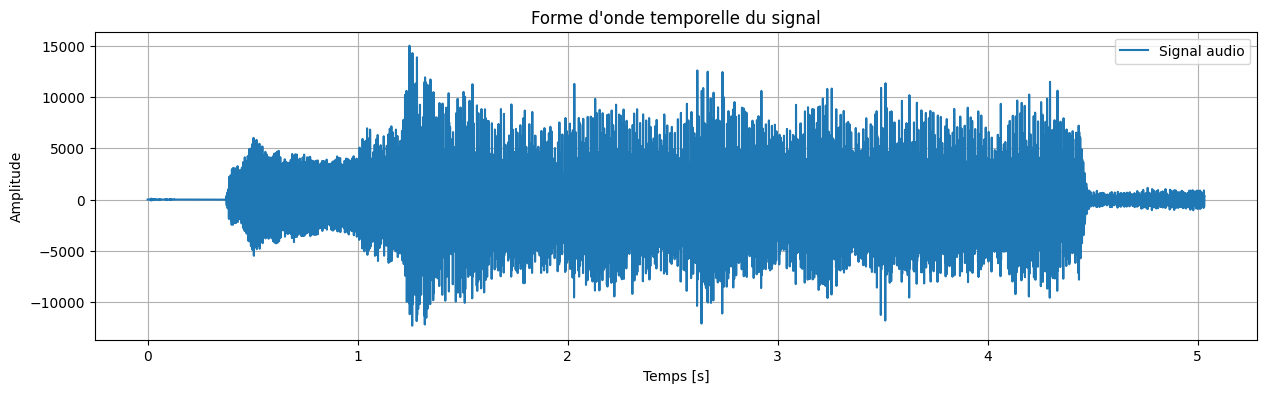

In [63]:
# Calculer le temps en secondes pour chaque échantillon
duration = len(data) / rate  # Durée totale en secondes
time = np.linspace(0., duration, len(data))  # Création d'une échelle de temps

# Tracé la forme d'onde
plt.figure(figsize=(15, 4))
plt.plot(time, data, label="Signal audio")
plt.xlabel("Temps [s]")
plt.ylabel("Amplitude")
plt.title("Forme d'onde temporelle du signal")
plt.legend()
plt.grid()
plt.show()

Pour estimer la densité spectrale de puissance du signal, on utilise la méthode Welch

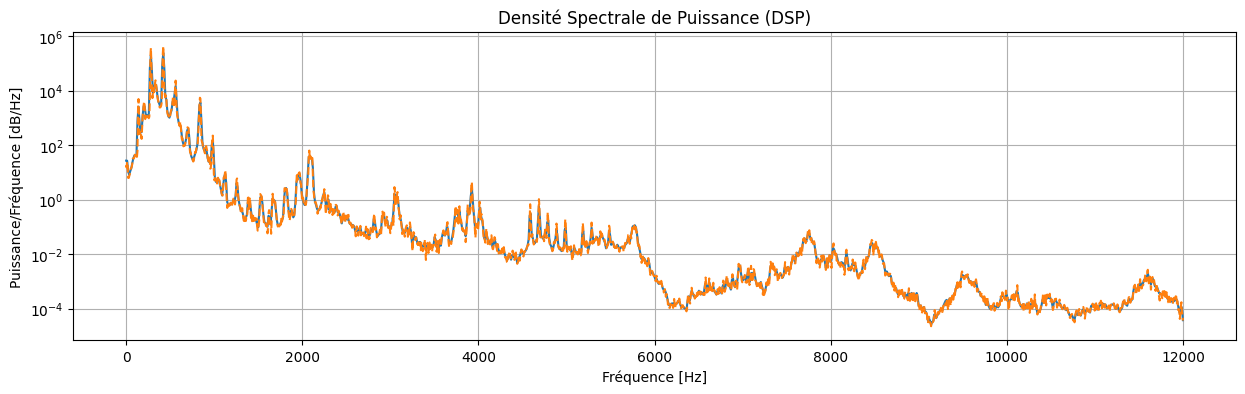

In [55]:
from scipy.signal import welch # importe la méthode de Welch

# Estimation de la densité spectrale de puissance avec la méthode de Welch
frequencies_2048, psd_2048 = welch(data, rate, nperseg=2048)
frequencies_4096, psd_4096 = welch(data, rate, nperseg=4096)

# Visualisation du spectre de puissance
plt.figure(figsize=(15, 4))
plt.semilogy(frequencies_2048, psd_2048)
plt.semilogy(frequencies_4096, psd_4096, linestyle='--')
plt.title('Densité Spectrale de Puissance (DSP)')
plt.xlabel('Fréquence [Hz]')
plt.ylabel('Puissance/Fréquence [dB/Hz]')
plt.grid()
plt.show()


On observe pas de pics particulier dans le tracé de la densité spectrale de puissance de notre signal. Ceci signifie Qu'il est difficile de discerner une fréquence dominante dans ce signal. Cette densité spectrale de puissance ne nous est pas très informative.Qu'il est difficile de discerner une fréquence dominante dans ce signal. Cette densité spectrale de puissance n'est pas très informative.

## **Question 3**:
### - Calculez et affichez le spectrogramme du signal.
### - Justifiez du choix des réglages que vous avez faits.
### - Sélectionnez une portion pertinente du spectrogramme pour estimer visuellement le pitch de votre voix.


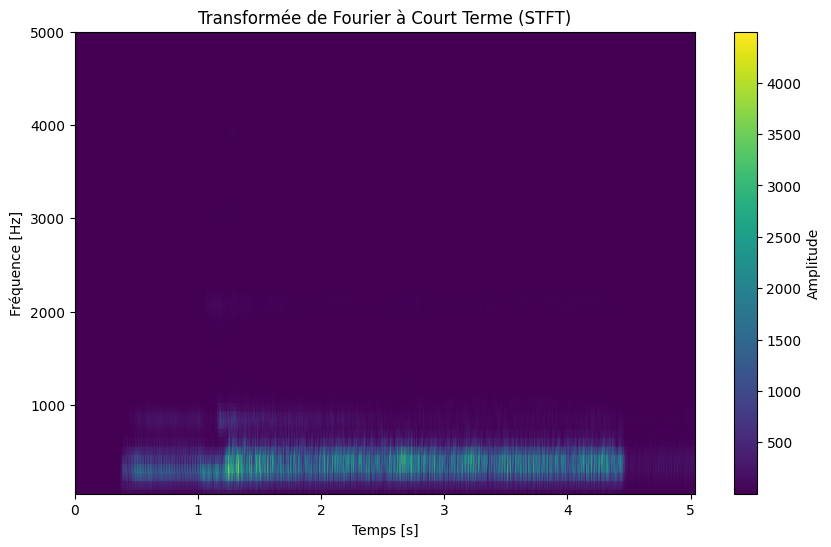

In [62]:
from scipy.signal import stft 

f, tfct, Zxx = stft(data, 
               fs=rate, 
               nperseg=256, 
               nfft=256, 
               noverlap = 256//2, 
               window= 'hamming')

plt.figure(figsize=(10, 6))
plt.pcolormesh(tfct, f, np.abs(Zxx), shading='gouraud', cmap='viridis')
plt.colorbar(label='Amplitude')
plt.title('Transformée de Fourier à Court Terme (STFT)')
plt.ylabel('Fréquence [Hz]')
plt.xlabel('Temps [s]')
plt.ylim(50, 5000)  # Ajuster la plage 
plt.show()

Pour estimer visuellement le pitch (hauteur) de ta voix à partir d'un spectrogramme, il faut choisir une portion pertinente du signal où les fréquences fondamentales de la voix sont bien visibles et les harmoniques sont suffisamment distinctes. Il est important de choisir une portion du signal qui représente un segment stable de la voix, par exemple, un moment où une note est tenue ou où la voix est stable, sans trop de fluctuations.

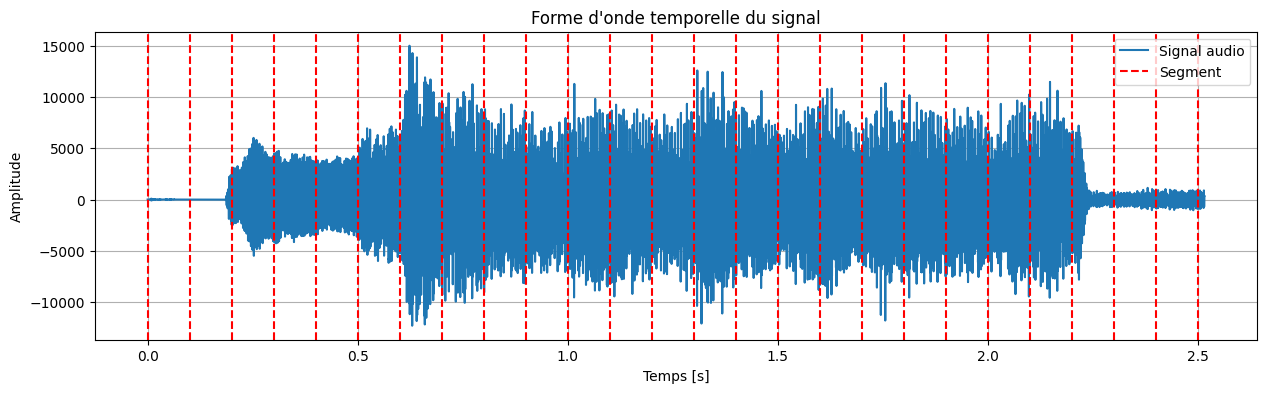

In [99]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du découpage
segment_duration = 0.1  # Durée de chaque segment en secondes
segment_times = np.arange(0, duration, segment_duration)  # Liste des instants de coupure

# Tracé de la forme d'onde
plt.figure(figsize=(15, 4))
plt.plot(time, data, label="Signal audio")
plt.xlabel("Temps [s]")
plt.ylabel("Amplitude")
plt.title("Forme d'onde temporelle du signal")

# Ajouter les lignes verticales rouges à chaque coupure de segment
for segment_time in segment_times:
    plt.axvline(x=segment_time, color='red', linestyle='--', label='Segment' if segment_time == 0 else "")

# Ajouter une légende, un titre et des grilles
plt.legend()
plt.grid()
plt.show()


Visuellemt, on voit qu'entre le 4e et le 5e baton, on capte un signal assez stationnaire et d'amplitude modérée. On se concentre sur celui-là

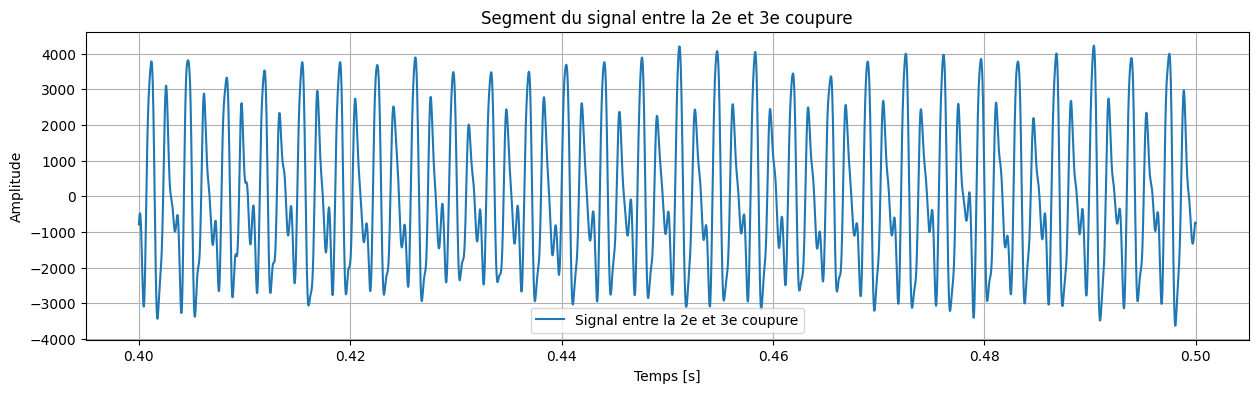

In [106]:
segment_samples = segment_duration * rate  # Nombre d'échantillons par segment

# Calcul des indices de coupure
start_index = int(4 * segment_samples)  # Indice correspondant à la 4e coupure
end_index = int(5 * segment_samples)    # Indice correspondant à la 5e coupure

# Extraction des données entre la 2e et la 3e coupure
segment_data = data[start_index:end_index]
segment_time = time[start_index:end_index]

# Afficher les valeurs du signal entre les deux coupures
plt.figure(figsize=(15, 4))
plt.plot(segment_time, segment_data, label="Signal entre la 2e et 3e coupure")
plt.xlabel("Temps [s]")
plt.ylabel("Amplitude")
plt.title("Segment du signal entre la 2e et 3e coupure")
plt.legend()
plt.grid()
plt.show()

On estime ensuite la densité spectrale sur cette portion de signal 

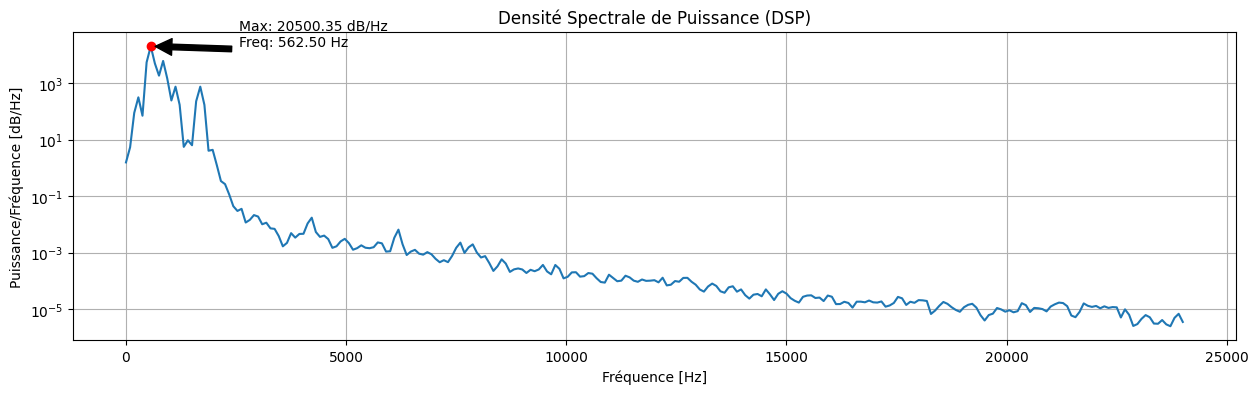

In [112]:
# Calcul de la densité spectrale de puissance
frequencies_seg, psd_seg = welch(segment_data, rate, nperseg=512)

# Visualisation du spectre de puissance
plt.figure(figsize=(15, 4))
plt.semilogy(frequencies_seg, psd_seg)
plt.title('Densité Spectrale de Puissance (DSP)')
plt.xlabel('Fréquence [Hz]')
plt.ylabel('Puissance/Fréquence [dB/Hz]')
plt.grid()

# Trouver la valeur maximale de la densité spectrale de puissance
max_index = np.argmax(psd_seg)  # Indice de la valeur maximale
max_value = psd_seg[max_index]  # Valeur maximale
max_frequency = frequencies_seg[max_index]  # Fréquence correspondante

# Tracer le point maximal sur le graphique
plt.plot(max_frequency, max_value, 'ro')  # Point rouge
plt.annotate(f'Max: {max_value:.2f} dB/Hz\nFreq: {max_frequency:.2f} Hz',
             xy=(max_frequency, max_value), 
             xytext=(max_frequency + 2000, max_value),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

On décerne 

## **Question 4 - Calcul du Pitch**:
### - Proposez une méthode simple pour estimer automatiquement le Pitch de votre voix (cette méthode ne doit pas faire intervenir d'implémentations externes).
### - Ne pas utiliser de méthode "toute faite" que vous pourriez par exemple trouver dans la bibliothèque librosa.

### - Commentez vos résultats.



## <div class=consignes>Partie 2: Détection d'impulsion </div>

<div class=consignes> Un signal de durée 1 seconde et échantillonné à 1000 Hz est composé d'un bruit blanc gaussien de puissance inconnue et éventuellement d'une impulsion à une fréquence f0 comprise entre 100 et 200 Hz. 
<br><br>
Une série de 1000 signaux est enregistrée dans le fichier signaux_impulsions.npz. 
Ouvez ce fichier avec numpy (cf code plus bas). Le fichier contient une tableau signaux 10000 x 1000 dont chaque ligne contient un signal de durée 1000. Le fichiez contient aussi un tableau labels de taille 10000 dont la ligne i est à TRUE si le signal i contient une impulsion et à 0 sinon. 

</div>

In [ ]:
donnees = np.load('signaux_impulsions.npz')
signaux = donnees['signaux']
labels = donnees['labels']

## <div class=consignes> Première méthode </div>

<div class=consignes> Proposez une méthode simple  pour décider si un signal contient une impulsion ou non à partir du calcul de l'énergie du signal. Cette méthode fera intervenir un seuil: 
</div>

```python
def contient_impulsion_energie(signal: np.ndarray, seuil: float) -> bool:
```

<div class=consignes>
Utilisez votre méthode avec un seuil fixé sur tous les signaux pour prédire s'ils contiennent une impulsion ou non. 
</div>

<div class=consignes>
Calculez: <br>
- VP = le nombre de signaux que vous détectez comme contenant une impulsion qui contiennet effectivement une impulsion <br>
- FP = le nombre de signaux que vous détectez comme contenant une impulsion qui ne contiennet en fait PAS une impulsion <br>
- VN = le nombre de signaux que vous détectez comme ne contenant PAS une impulsion qui ne contiennet effectivement PAS une impulsion<br>
- FN = le nombre de signaux que vous détectez comme ne contenant PAS une impulsion mais qui  contiennet en fait une impulsion
</div>

## <div class=consignes>Deuxième méthode </div>

<div class=consignes>Proposez une deuxième méthode faisant par exemple intervenir le spectrogramme du signal. Cette méthode fera encore intervenir un seuil
</div>

```python
def contient_impulsion_spectrogramme(signal: np.ndarray, seuil: float) -> bool:
```


<div class=consignes> Calculez pour cette nouvelle méthode, pour un certain seuil les valeurs de VP, FP, VN, FN </div>

## <div class=consignes> Comparaison des méthodes </sdivs>

<div class=consignes>Pour une méthode de détection et un seuil donné, la précision est définie comme: 
$$ \frac{\sharp\text{Signaux détectés comme contenant une impulsion qui en contiennent effectivement une}}{\sharp\text{Signaux détectés comme positifs }}$$
et le rappel comme:
$$ \frac{\sharp\text{Signaux détectés comme contenant une impulsion qui en contiennent effectivement une}}{\sharp \text{Signaux contenant une impulsions}} $$
    
</div>

<div class=consignes> Donnez une interprétation de ces deux métriques </div>

<div class=consignes>
    Pour chacune des deux méthodes proposées, faites varier le seuil sur une dizaine de valeurs et calculez la précision et le rappel pour chacun de ces seuils. 

Affichez dans le plan (précision , rappel) les points de fonctionnement des deux méthodes pour différents seuils. <br>Commentez le résultat. 
    </div>